# Baseball Case Study

Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset
df=pd.read_csv('baseball.csv')

In [4]:
#taking a look at first 5 rows of the dataset
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
#Checking the shape of the dataset
df.shape

(30, 17)

It contains 30 rows and 17 columns

In [6]:
#Column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Columns description:

W-  Number of wins (Target variable)

R-  Runs

AB- At Bats

H-  Hits

2B- Doubles

3B- Triples

HR- Homeruns

BB- Walks

SO- Strikeouts

SB- Stolen Bases

RA- Runs Allowed

ER- Earned Runs

ERA-Earned Run Average 

CG- Complete Games

SHO-Shutouts

SV- Saves

E- Errors

In [7]:
#checing data types
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the columns have int data type except for ERA which is float.

In [8]:
#Checking null values 
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

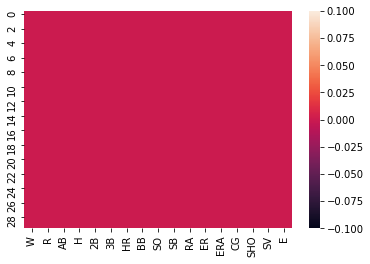

In [9]:
sns.heatmap(df.isnull())

We don't have null values in our dataset.

# Visualization of the data:

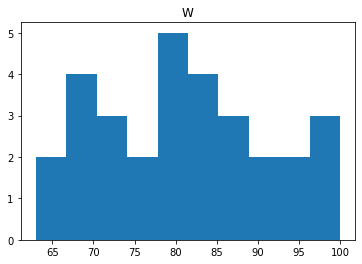

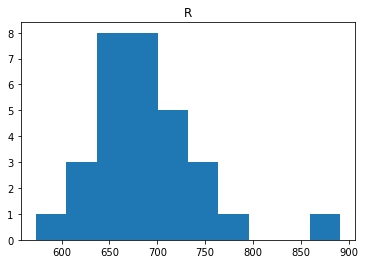

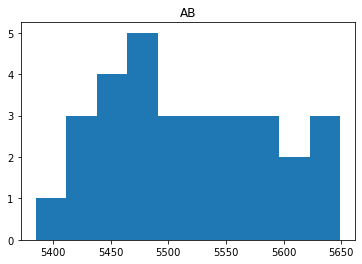

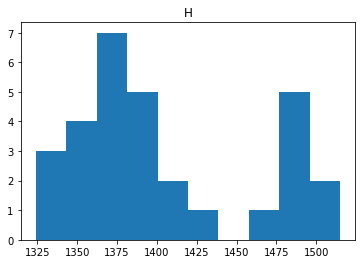

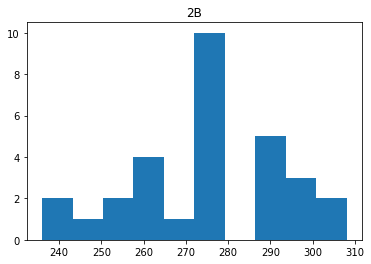

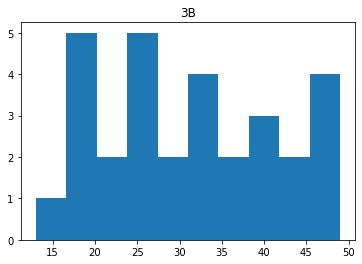

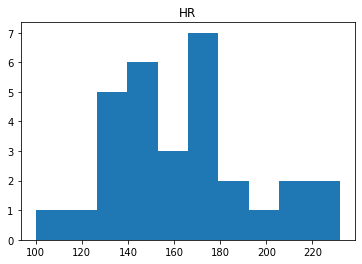

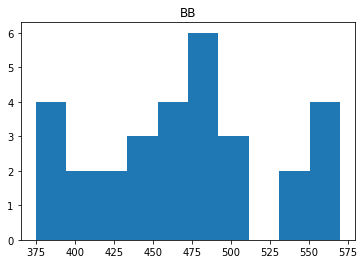

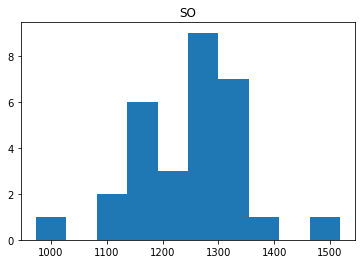

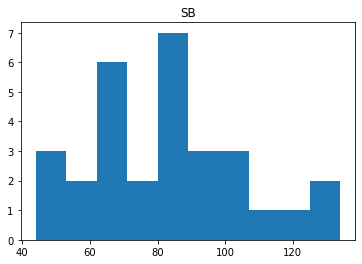

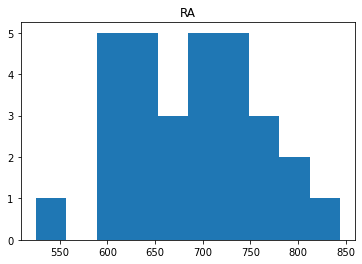

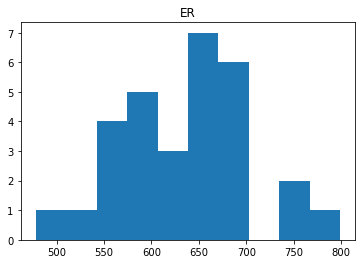

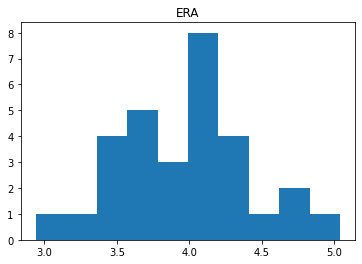

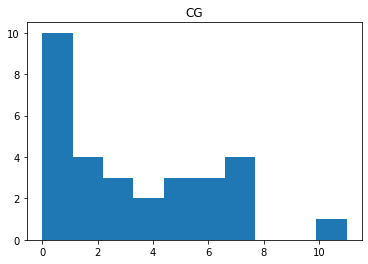

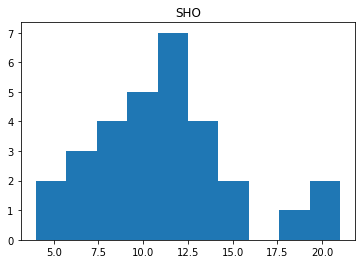

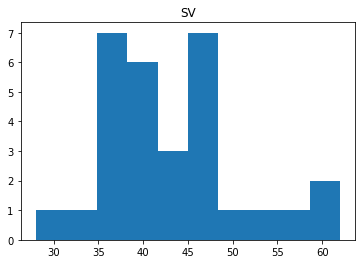

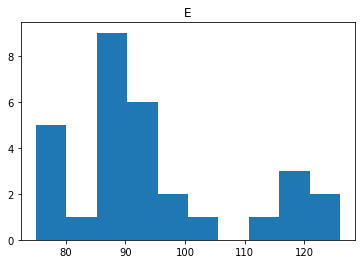

In [10]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

Observations:

1.Number of wins ranges from 63 to 100. Average number of wins is between 78 and 82.

2.Runs ranges from 570 to 890. Most of the runs scored are between 640 to 700.

3.There is a gap present in the following columns:R,H,2B,BB,SO,RA,ER,CG,SHO and E.



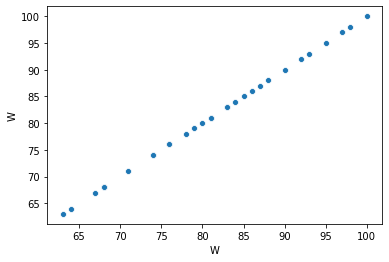

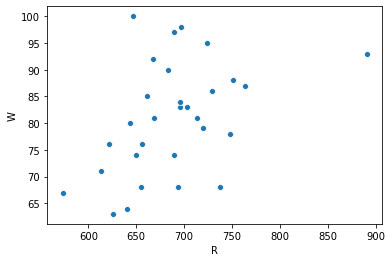

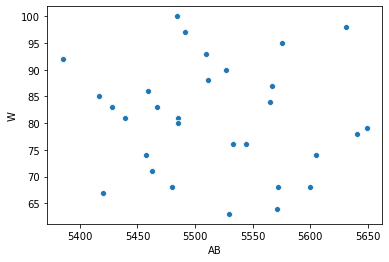

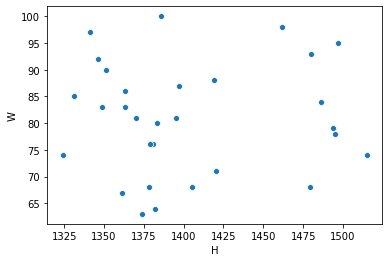

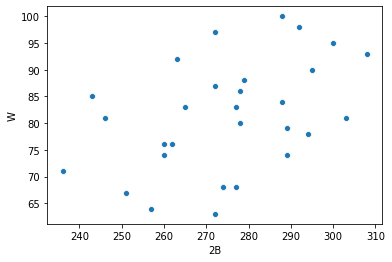

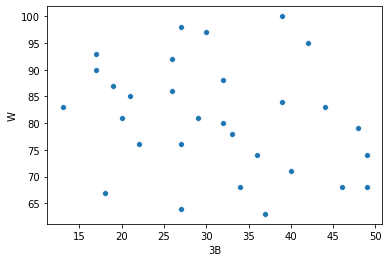

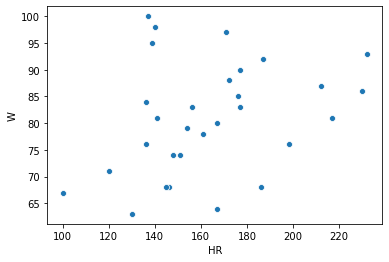

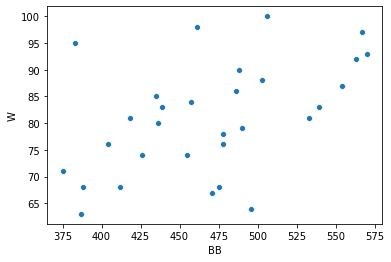

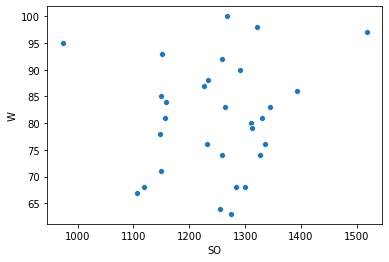

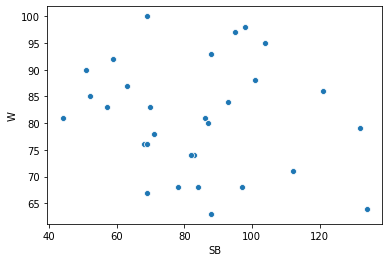

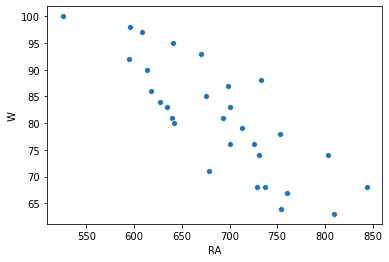

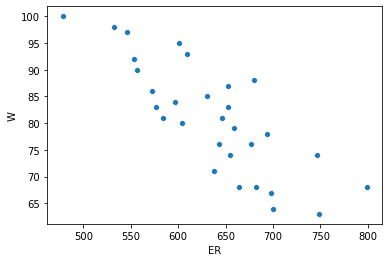

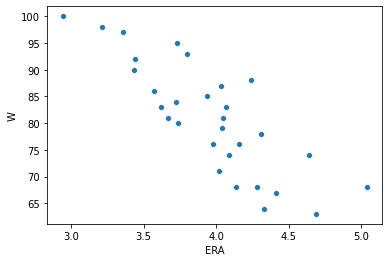

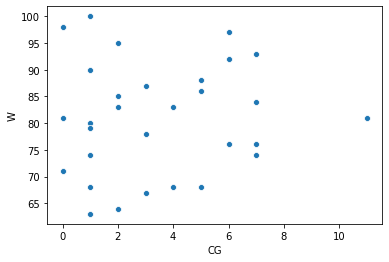

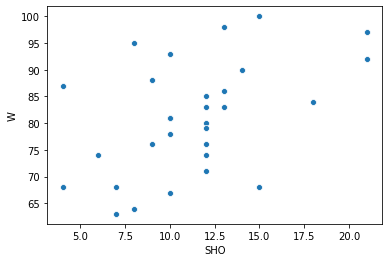

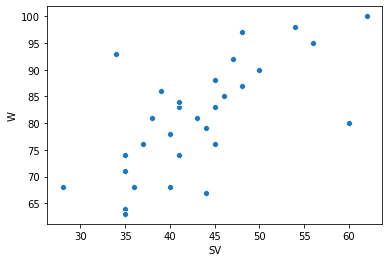

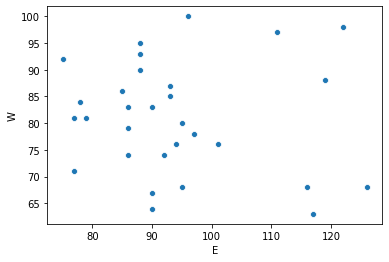

In [11]:
#Cheking relation of target variable with other variables
for i in df.columns:
    sns.scatterplot(df[i],df['W'])
    plt.show()

Observation:
    
 1.There is a negative linear relation between number of wins(W) and RA, ER and ERA.
 
 2.There is positive linear relation between number of wins(W) and SV and R.

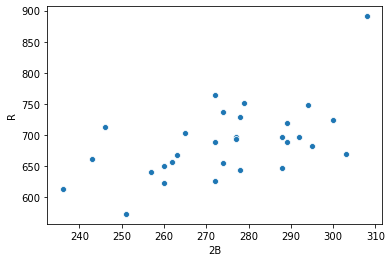

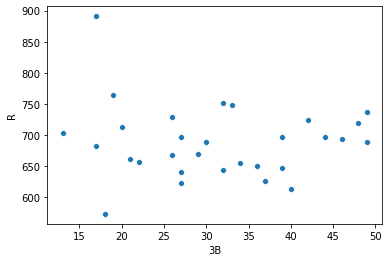

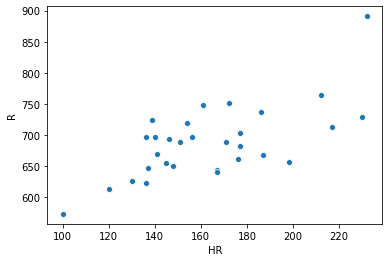

In [12]:
#Lets check relation betweeen R and 2B,3B & HR
c=['2B','3B','HR']
for i in c:
    sns.scatterplot(df[i],df['R'])
    plt.show()

There is a positive linear relation between runs(R) and 2B(doubles) & HR(home runs).

There is no linear relation between runs(R) and 3B(Triples).

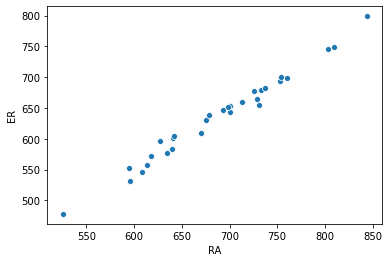

In [13]:
#Lets see the relation between runs allowed(RA) and earned runs(ER)
sns.scatterplot(df['RA'],df['ER'])
plt.show()

There is a strong positive linear relaiton between RA and ER.

Lets check the distribution of the data:

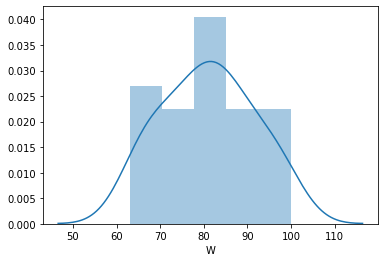

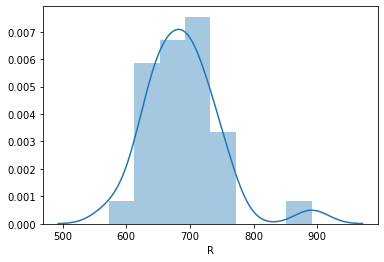

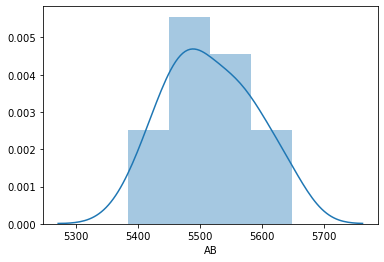

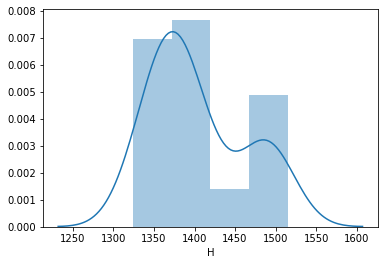

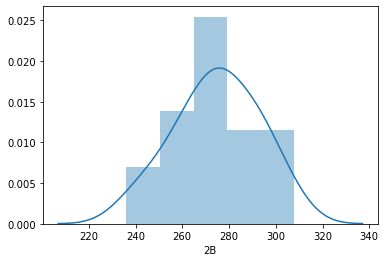

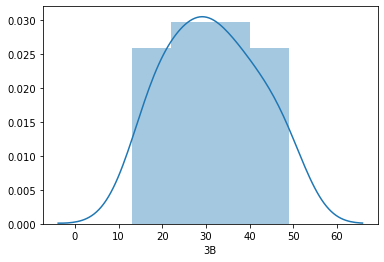

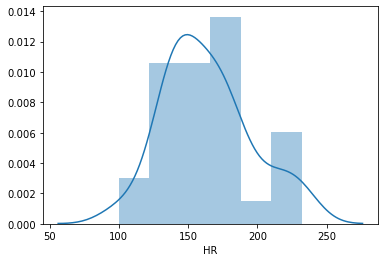

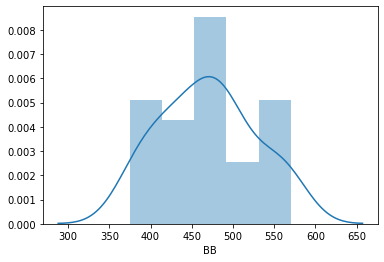

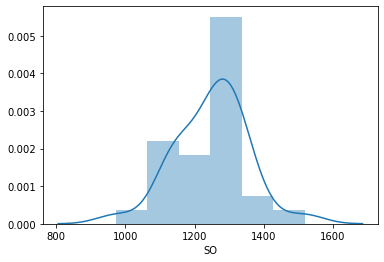

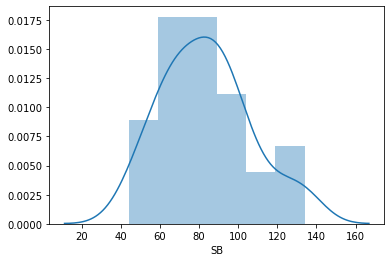

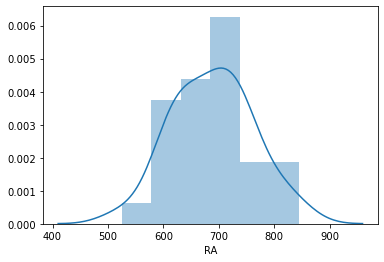

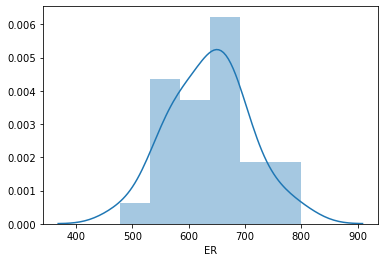

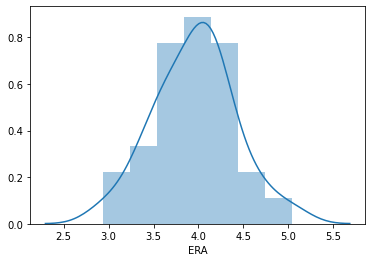

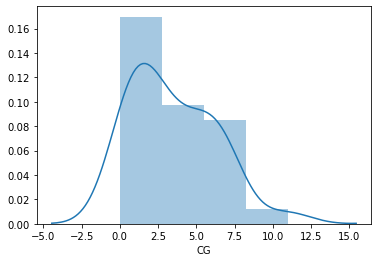

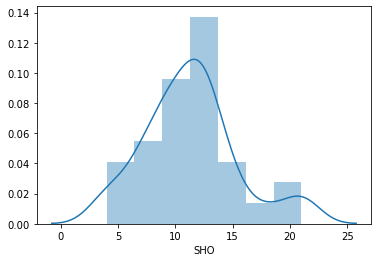

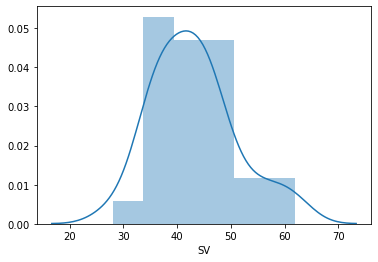

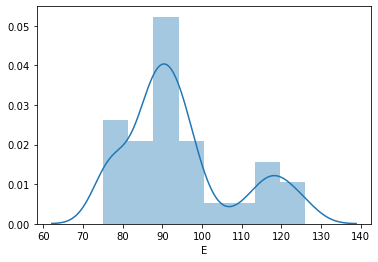

In [14]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()
    

All the columns are near to normal distribution, it shows that there is a very low chances of skewness in the data.

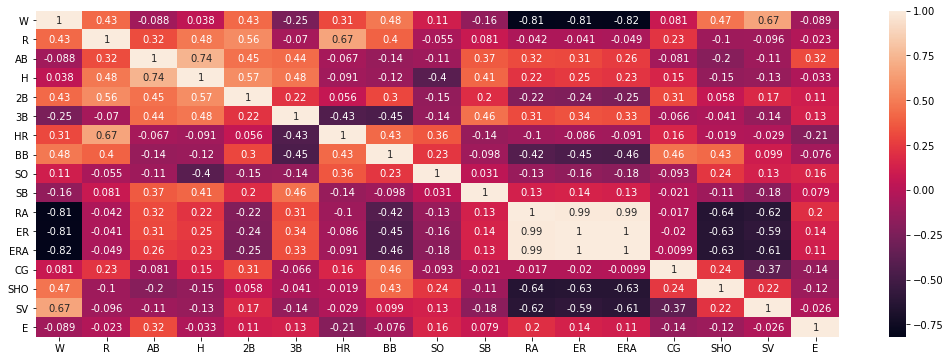

In [15]:
#Cheking correlation 
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True)

observations:
    
1.There is positive correlation between number of wins(W) and R,2B,BB,SHO and SV.

2.Number of wins(W) have high negative correlation RA,ER and ERA.

3.RA and ER,ERA are highly positively correlated.

4.ER and ERA have 1 correlation with each other as ERA is average of ER.

5.SHO and SV are negatively correlated with RA,ERA and ER.

Out of the three independent variables (RA,ER AND ERA), we need to remove 2 columns from these three, as they are strongly correlated with each other which will result in multicollinearity and will reduce our model performance.

In [16]:
#Keeping ERA column and removing RA and ER, as ERA is the average of ER and ERA have a correlation of -0.82 with the number of wins(W).
df.drop(columns=['RA','ER'],axis=1,inplace=True)

In [17]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [18]:
df.shape

(30, 15)

In [19]:
#Describing the data
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Obdervations:
 
1.The average number of wins is 80.

2.There is no huge difference between 75% and maximum in any column.

3.There is a difference in the ranges of columns, therefore we need to bring our data in one standard format.

4.CG (Complete games) have a minimum of 0 and maximum 11.


# Outliers detection:

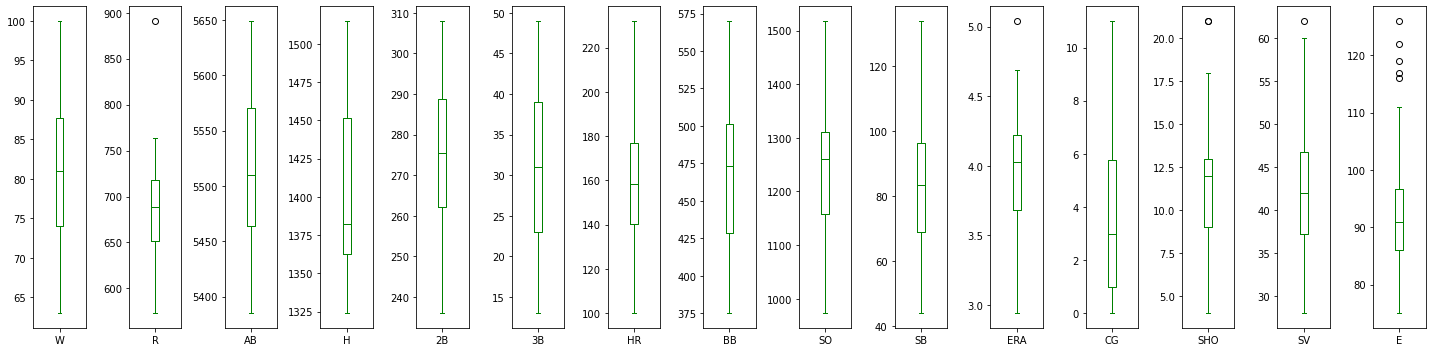

In [20]:
df.plot(kind='box',subplots=True,layout=(1,15),figsize=(20,5),color='green')
plt.tight_layout()

There are only few outliers in E (errors) column which are also close to the maximum range.

There is a single outlier in R,ERA and SHO column each, the outlier in runs(R) column is far from the maximum range.


In [21]:
#Checking outliers using z-score
from scipy.stats import zscore
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [22]:
zscr[5][1]

3.5096470447193067

In [23]:
print('shape before removing the outliers:' , df.shape)
df_new=df[(zscr<3).all(axis=1)]
print('shape after removing outliers :', df_new.shape)

shape before removing the outliers: (30, 15)
shape after removing outliers : (29, 15)


As there is only 1 otlier and the number of observations i.e, our dataset is very small therfore we will not remove it.

In [24]:
#Spliting the independent and target variable in x and y. 
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [25]:
#Checking skewness
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Keeping +/- 0.6 as the range for skewness, following columns contains skewness: R, CG, and E

In [26]:
#Removing skewness
c=['H','CG','E']
for i in c:
    x[i]=np.log1p(x[i])

In [27]:
x.skew()

R      1.200786
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG    -0.325962
SHO    0.565790
SV     0.657524
E      0.632916
dtype: float64

Skewness is removed from our data.

In [28]:
#Scaling data using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)
df_x=pd.DataFrame(df_x,columns=x.columns)

In [29]:
x=df_x

In [30]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.649382,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.506955,-0.278921,-0.814629,1.671607,-0.427060
1,0.134432,-0.711094,-0.981656,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.254598,-0.278921,0.172800,0.249879,-0.591693
2,-0.332906,-1.115233,-0.134210,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.641347,1.762778,-0.320914,-0.654856,-1.199289
3,-1.146419,0.241522,-0.389136,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.053010,1.165619,-0.567771,-0.784104,0.560495
4,0.013270,1.280738,1.951480,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.531318,1.165619,0.172800,-1.042600,-0.591693


In [31]:
x.shape,y.shape

((30, 14), (30,))

Finding the best random state:

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.9565386318118123
At random state 0 Testing accuracy is: 0.7342553641188002


At random state 1 Training accuracy is: 0.9835460682807167
At random state 1 Testing accuracy is: 0.35602939534952216


At random state 2 Training accuracy is: 0.9685371085974596
At random state 2 Testing accuracy is: 0.11111667591663821


At random state 3 Training accuracy is: 0.9642401217030865
At random state 3 Testing accuracy is: 0.6673852622053286


At random state 4 Training accuracy is: 0.9347108870013984
At random state 4 Testing accuracy is: 0.8090611279657758


At random state 5 Training accuracy is: 0.9438916820312148
At random state 5 Testing accuracy is: 0.8550905034466475


At random state 6 Training accuracy is: 0.9184466438997037
At random state 6 Testing accuracy is: 0.8517937367875636


At random state 7 Training accuracy is: 0.9343077290943249
At random state 7 Testing accuracy is: 0.8759898942113653


At random state 8 Training accuracy is: 0.9592

In [34]:
#At random state 83 we are getting the best result. Therefore we will split our train and test data at random state 83.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=83)
x_train.shape,x_test.shape,y_train.shape,y_test.shape 
#83 93 90

((21, 14), (9, 14), (21,), (9,))

In [35]:
#Checking different models performance 
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [36]:
ls=Lasso()
rd=Ridge()
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

In [37]:
model=[lr,ls,rd,svr,knn,rf,ada]

for i in model:
    print('\n')
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    pred_t=i.predict(x_train)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('Testing r2_score:',r2_score(y_test,pred))
    print('Training r2_score:',r2_score(y_train,pred_t))
    scores=cross_val_score(i, x, y, cv=4)
    print('Cross Validation Score:',scores.mean())



LinearRegression()
score: 0.9346516804785662
mean absolute error: 2.2842206085425483
Root mean squared error: 2.8674967308815327
Testing r2_score: 0.9067974338607727
Training r2_score: 0.9346516804785662
Cross Validation Score: 0.6401753465604091


Lasso()
score: 0.8812510382393974
mean absolute error: 2.591467810723543
Root mean squared error: 3.4002256212147177
Testing r2_score: 0.8689498633797417
Training r2_score: 0.8812510382393974
Cross Validation Score: 0.8133858191466545


Ridge()
score: 0.9277663916070545
mean absolute error: 2.987404268738023
Root mean squared error: 3.71858879364467
Testing r2_score: 0.8432605496902047
Training r2_score: 0.9277663916070545
Cross Validation Score: 0.7289957969437305


SVR()
score: 0.24322400872224448
mean absolute error: 8.19651817809873
Root mean squared error: 9.342961760438216
Testing r2_score: 0.010556158547736838
Training r2_score: 0.24322400872224448
Cross Validation Score: -0.13948125070905423


KNeighborsRegressor()
score: 0.6573190

Lasso is giving the best results with testing r2 score- 86% , training r2 score- 88%, RMSE- 3.4 and MAE- 2.5

# Hyper parameter tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameters={'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
gcv=GridSearchCV(ls,parameters,cv=4)

In [40]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]})

In [41]:
#checking the best parameters
gcv.best_params_

{'alpha': 0.03}

In [42]:
predgcv=gcv.best_estimator_.predict(x_test)

In [43]:
print('mean absolute error:',mean_absolute_error(y_test,predgcv))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predgcv)))
print('r2_score:',r2_score(y_test,predgcv))

mean absolute error: 2.3577078440643016
Root mean squared error: 2.9989919673237626
r2_score: 0.8980534315105138


We have our best model with r2 score of 89% , MAE-2.35 and RMSE-2.99

In [45]:
#Saving the model
import joblib
joblib.dump(gcv.best_estimator_,'baseball_ls.obj')

['baseball_ls.obj']